In [61]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import descartes
import geopandas as gdp
from shapely.geometry import Point, Polygon
from pyproj import Proj, transform
from pyproj import CRS

%matplotlib inline

In [55]:
# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/wingochau/Dissertation/main/EV_Charger_Locations_EPD.csv')

In [56]:
# import street map
street_map = gpd.read_file('Hong_Kong_18_Districts-shp/HKDistrict18.shp')

In [62]:
# designate coordinate system
crs=CRS('EPSG:2326').to_proj4()
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df,
 crs = crs,
 geometry = geometry)

/opt/conda/envs/sds2020/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  


In [66]:
geo_df.head(3)

,District,Government,Other,Sub-total,latitude,longitude,geometry
0,Central & Western,191,73,264,22.2730,114.1499,POINT (114.14990 22.27300)
1,Eastern,75,116,191,22.2734,114.2361,POINT (114.23610 22.27340)
2,Southern,0,55,55,22.2432,114.1974,POINT (114.19740 22.24320)


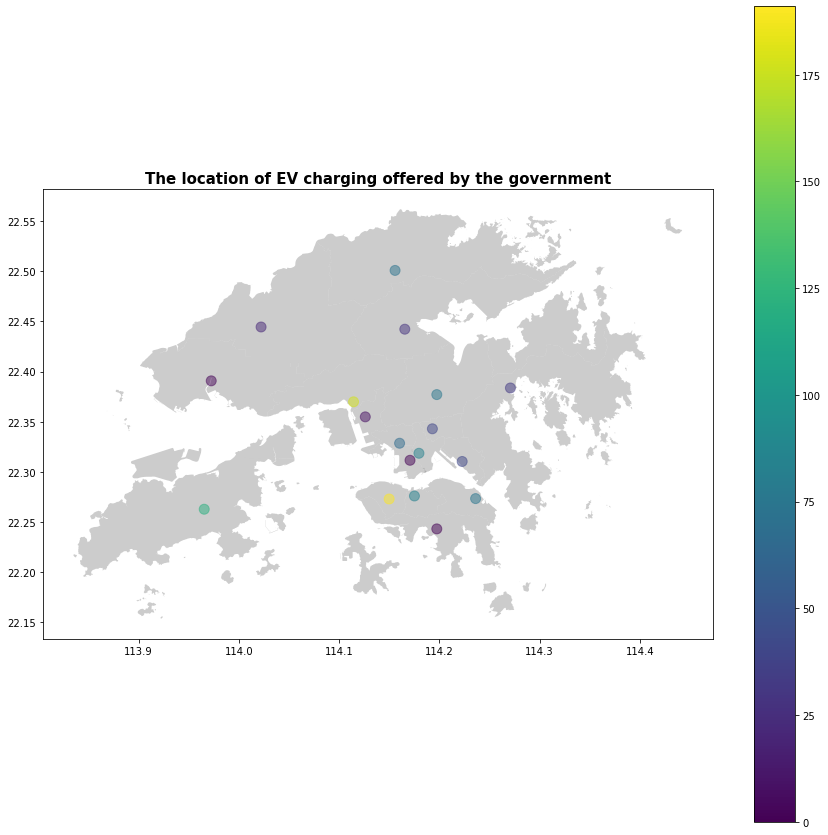

In [72]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4,color='grey')

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='Government',ax=ax,alpha=0.5, legend=True,markersize=100)

# add title to graph
plt.title('The location of EV charging offered by the government', fontsize=15,fontweight='bold')

# show map
plt.show()